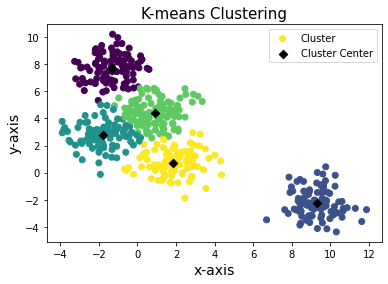

Mean NRP : 
Year           2004.500000
Ireland           0.075984
Netherlands       0.394882
Denmark           0.787061
dtype: float64



NRP 2013 : 
    Year   Ireland Netherlands   Denmark
23  2013  0.011127    0.925753  1.035191


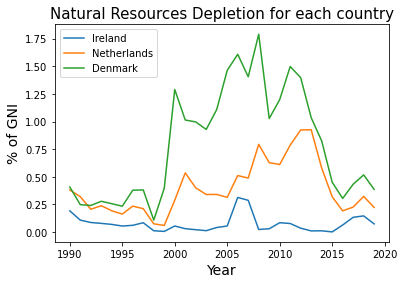

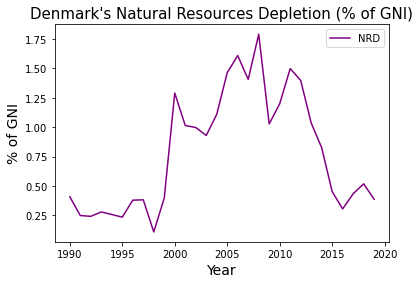

parameters: [ 8.50250495e-01 -6.55397793e-01  2.01752595e+03]
std. dev. [0.1073633  0.92628636 2.0274869 ]


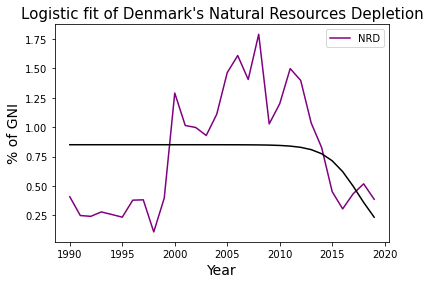

Future Logisitc Values 2021-2030 :
[0.07912041 0.04300612 0.02288685 0.01203947 0.00629417 0.00327983
 0.00170617 0.00088676 0.00046067 0.00023926]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030]


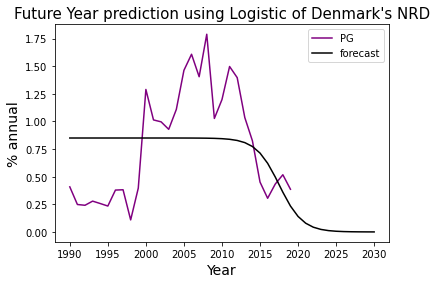

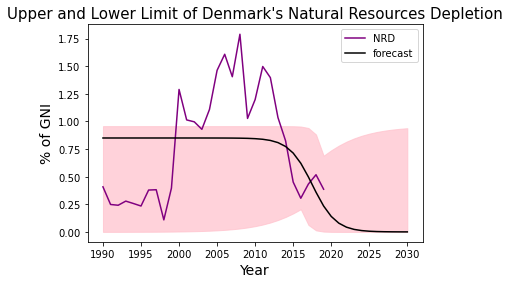

(8.120325922465913e-11, 0.9391343855280394)


In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# Define the number of clusters for the dataset
n_clusters = 5


def load_dataset(n_samples: int, n_clusters: int):
    """Generate a random dataset with the specified number of samples and clusters."""
    # Generate a random dataset using make_blobs function from sklearn.datasets
    X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=0)
    return X, y


# Load the dataset using the load_dataset function
X, y = load_dataset(500, n_clusters)


def kmeans_clustering(X, n_clusters):
    """Perform k-means clustering on the input dataset X with the specified number of clusters."""
    # Instantiate the KMeans class from sklearn.cluster with the specified
    # number of clusters and random state
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    return kmeans


# Perform k-means clustering on the dataset using the kmeans_clustering
# function
kmeans = kmeans_clustering(X, n_clusters)


def plot_kmeans_clusters(X, kmeans, x_label, y_label, title):
    """Plot the clusters and cluster centers of the input dataset using k-means clustering."""
    # Plot the datapoints with different colors for each cluster label
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    # Plot the cluster centers as black diamonds
    plt.scatter(
        kmeans.cluster_centers_[
            :, 0], kmeans.cluster_centers_[
            :, 1], marker='D', color='black')
    # Set the x-axis and y-axis labels
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    # Set the title of the plot
    plt.title(title, fontsize=15)
    # Add a legend to the plot
    plt.legend(['Cluster', 'Cluster Center'])
    # Show the plot
    plt.show()


# Plot the clusters and cluster centers using the plot_kmeans_clusters function
plot_kmeans_clusters(X, kmeans, 'x-axis', 'y-axis', 'K-means Clustering')


def read_worldbank_data(file_path: str):
    """Read the World Bank data from the given file path and return the original and transposed dataframes."""
    # Read the CSV file using pandas.read_csv function
    original_df = pd.read_csv(file_path)
    # Extract the 'Country Name' column from the original dataframe as a list
    country = list(original_df['Country Name'])
    # Transpose the original dataframe using the .transpose() method and set
    # the columns to the list of country names
    transposed_df = original_df.transpose()
    transposed_df.columns = country
    # Remove the first 4 rows and last row from the transposed dataframe using
    # .iloc[]
    transposed_df = transposed_df.iloc[4:]
    transposed_df = transposed_df.iloc[:-1]
    # Reset the index of the transposed dataframe and rename the 'index'
    # column to 'Year'
    transposed_df = transposed_df.reset_index()
    transposed_df = transposed_df.rename(columns={"index": "Year"})
    # Convert the 'Year' column to an integer datatype
    transposed_df['Year'] = transposed_df['Year'].astype(int)
    return original_df, transposed_df


# Call the read_worldbank_data function with the given file path and store
# the returned dataframes in df1 and df2
df1, df2 = read_worldbank_data('data 2.csv')


def calculate_nrd_stats(dataframe):
    """Calculate the mean NRP and NRP in 2013 for the input dataframe."""
    # Calculate the mean NRP for the dataframe using the .mean() method
    mean_nrp = dataframe.mean()
    print("Mean NRP : ")
    print(mean_nrp)
    print("\n\n")

    # Filter the dataframe to only include rows where the 'Year' column is 2013
    nrp_2013 = dataframe[dataframe['Year'] == 2013]
    print("NRP 2013 : ")
    print(nrp_2013)


# Call the calculate_nrd_stats function with the transposed dataframe df2
calculate_nrd_stats(df2)


def plot_nrd_over_time(df, countries):
    """Plot the natural resources depletion over time for the specified countries in the input dataframe."""
    # Plot the specified countries' natural resources depletion over time
    # using the .plot() method
    df.plot(x='Year', y=countries)
    # Set the plot title, x-axis label, and y-axis label
    plt.title("Natural Resources Depletion for each country", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    # Show the plot
    plt.show()


# Extract the list of country names from the original dataframe df1
country_name = list(df1['Country Name'])
# Call the plot_nrd_over_time function with the transposed dataframe df2
# and the list of country names
plot_nrd_over_time(df2, country_name)


def read_worldbank_data(file_path: str):
    """Read the World Bank data from the given file path and return the original and transposed dataframes."""
    # Read the CSV file using pandas.read_csv function
    original_df = pd.read_csv(file_path)
    # Extract the 'Country Name' column from the original dataframe as a list
    country = list(original_df['Country Name'])
    # Transpose the original dataframe using the .transpose() method and set
    # the columns to the list of country names
    transposed_df = original_df.transpose()
    transposed_df.columns = country
    # Remove the first 4 rows and last row from the transposed dataframe using
    # .iloc[]
    transposed_df = transposed_df.iloc[4:]
    transposed_df = transposed_df.iloc[:-1]
    # Reset the index of the transposed dataframe and rename the 'index'
    # column to 'Year'
    transposed_df = transposed_df.reset_index()
    transposed_df = transposed_df.rename(columns={"index": "Year"})
    # Convert the 'Year' column to an integer datatype
    transposed_df['Year'] = transposed_df['Year'].astype(int)
    return original_df, transposed_df


# Call the read_worldbank_data function with the given file path and store
# the returned dataframes in original_df and transposed_df
original_df, transposed_df = read_worldbank_data("data 1.csv")

# Extract the list of country names from the original dataframe original_df
country = list(original_df['Country Name'])


def plot_natural_resources_depletion(df, country):
    """Plot the natural resources depletion over time for the specified country in the input dataframe."""
    # Plot the natural resources depletion over time using the .plot() method
    df.plot("Year", country, color="purple")
    # Set the plot title, x-axis label, y-axis label, and legend
    plt.title(
        f"{country}'s Natural Resources Depletion (% of GNI)",
        fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.legend(["NRD"])
    # Show the plot
    plt.show()


# Call the plot_natural_resources_depletion function with the transposed
# dataframe transposed_df and the first country in the list of countries
plot_natural_resources_depletion(transposed_df, country[0])


def logistic(t, n0, g, t0):
    """Calculate the logistic function with the specified parameters."""
    f = n0 / (1 + np.exp(-g * (t - t0)))
    return f


# Set the input dataframe as transposed_df
df = transposed_df
# Fit the logistic function to the data using scipy.optimize.curve_fit()
# function
param, covar = opt.curve_fit(
    logistic, df["Year"], df[country].squeeze(), p0=(
        float(
            df[country].iloc[0]), 0.03, 2000.0))
# Calculate the standard deviation of the parameters
sigma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)

# Add a new column to the input dataframe transposed_df that contains the
# values of the fitted logistic function
df["fit"] = logistic(df["Year"], *param)


def plot_logistic_fit(df, country):
    """
    Plots the logistic fit of a country's Natural Resources Depletion.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    country (str): The name of the country to be plotted.

    Returns:
    None
    """
    df.plot("Year", [country, "fit"], color=["purple", "black"])
    plt.title(
        "Logistic fit of {}'s Natural Resources Depletion".format(country),
        fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.legend(["NRD"])
    plt.show()


plot_logistic_fit(df, country[0])


future_years = [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
future_log = logistic(future_years, *param)

print("Future Logisitc Values 2021-2030 :")
print(future_log)


year = np.arange(df['Year'][0], 2031)
print(year)
forecast = logistic(year, *param)


def plot_future_prediction(df, country, forecast, year):
    """
    Plots the future prediction using the logistic fit of a country's Natural Resources Depletion.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data to be plotted.
    country (str): The name of the country to be plotted.
    forecast (numpy.array): The forecasted values for the country.
    year (numpy.array): The years for the forecasted values.

    Returns:
    None
    """
    plt.plot(df["Year"], df[country], label="PG", color="purple")
    plt.plot(year, forecast, label="forecast", color="black")

    plt.title(
        "Future Year prediction using Logistic of {}'s NRD".format(country),
        fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% annual", fontsize=14)
    plt.legend(["PG"])
    plt.legend()
    plt.show()


plot_future_prediction(df, country[0], forecast, year)


df2 = pd.DataFrame({'Future Year': future_years, 'Logistic': future_log})
df2


def err_ranges(x, func, param, sigma):
    """
    Calculates the error ranges for a given function.

    Parameters:
    x (numpy.array): The x values for the function.
    func (callable): The function to calculate error ranges for.
    param (list): The parameters of the function.
    sigma (numpy.array): The standard deviations of the parameters.

    Returns:
    tuple: A tuple containing the lower and upper limits of the error ranges.
    """
    import itertools as iter

    lower = func(x, *param)
    upper = lower

    uplow = []
    for p, s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))

    pmix = list(iter.product(*uplow))

    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)

    return lower, upper


low, up = err_ranges(year, logistic, param, sigma)


def plot_prediction_limits(df, country, forecast, year, low, up):
    """
    Plots the upper and lower limit of a country's Natural Resources Depletion (NRD) prediction.

    Args:
    - df (pandas.DataFrame): Dataframe containing the country's NRD data.
    - country (str): Country's name.
    - forecast (numpy.ndarray): Array containing predicted values for future years.
    - year (numpy.ndarray): Array containing all years from the first year of data to the last predicted year.
    - low (numpy.ndarray): Array containing lower limit values for each year.
    - up (numpy.ndarray): Array containing upper limit values for each year.

    Returns:
    - None
    """
    plt.figure()
    plt.plot(df["Year"], df[country], label="NRD", color="purple")
    plt.plot(year, forecast, label="forecast", color="black")

    plt.fill_between(year, low, up, color="pink", alpha=0.7)
    plt.title(
        "Upper and Lower Limit of {}'s Natural Resources Depletion".format(country),
        fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.legend()
    plt.show()


# Plot upper and lower limit of NRD prediction for the chosen country
plot_prediction_limits(df, country[0], forecast, year, low, up)

# Print the upper and lower limit values for NRD prediction for the year 2030
print(err_ranges(2030, logistic, param, sigma))
